In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import pandas as pd
import numpy as np

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dataset = sns.load_dataset("iris")
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


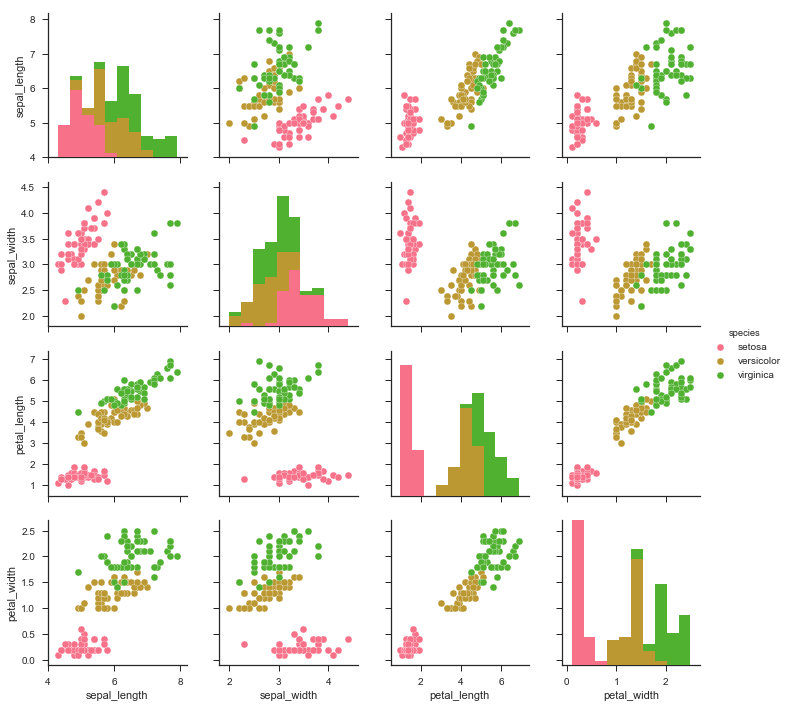

In [3]:
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(dataset.iloc[:,0:6], hue="species")

In [4]:
#Splitting the data into training and test
X = dataset.iloc[:,0:4].values
y = dataset.iloc[:,4].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [5]:
#X
#y
#y1
#Y
len(X_test)

30

0 = setosa
1 = versicolor
2 = virginica

In [6]:
model = Sequential()

model.add(Dense(4,input_shape=(4,),activation='relu'))
#model.add(Dense(8,activation='tanh'))
#model.add(Dense(6,activation='tanh'))
model.add(Dense(3,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


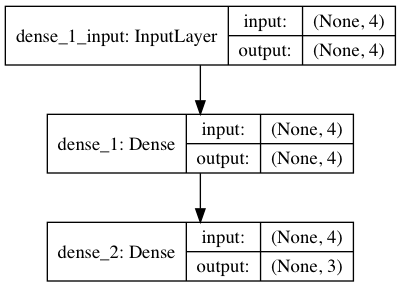

In [7]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(filename='model_plot.png')

See 'model_plot.png' in notebook's file location

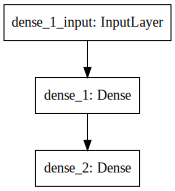

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

If you get the error: "ImportError: Failed to import pydot. You must install pydot and graphviz for pydotprint to work" you must install pydot and graphviz. Run the following commands:pydot
pip install pydot
pip install graphviz

additionally on a Mac, you may need to:pydot
brew install graphviz

In [9]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
120/120 [==============================] - 0s 1ms/step - loss: 2.2708 - acc: 0.2833
Epoch 2/100
120/120 [==============================] - 0s 83us/step - loss: 1.4815 - acc: 0.3000
Epoch 3/100
120/120 [==============================] - 0s 126us/step - loss: 1.2996 - acc: 0.2333
Epoch 4/100
120/120 [==============================] - 0s 108us/step - loss: 1.1047 - acc: 0.3250
Epoch 5/100
120/120 [==============================] - 0s 102us/step - loss: 1.0269 - acc: 0.5750
Epoch 6/100
120/120 [==============================] - 0s 105us/step - loss: 1.0331 - acc: 0.6917
Epoch 7/100
120/120 [==============================] - 0s 130us/step - loss: 0.9848 - acc: 0.6917
Epoch 8/100
120/120 [==============================] - 0s 81us/step - loss: 0.8928 - acc: 0.6917
Epoch 9/100
120/120 [==============================] - 0s 144us/step - loss: 0.8118 - acc: 0.6917
Epoch 10/100
120/120 [==============================] - 0s 106us/step - loss: 0.7212 - acc: 0.6917
Epoch 11/100
120/120 [=

120/120 [==============================] - 0s 84us/step - loss: 0.0672 - acc: 0.9750
Epoch 84/100
120/120 [==============================] - 0s 124us/step - loss: 0.0794 - acc: 0.9750
Epoch 85/100
120/120 [==============================] - 0s 137us/step - loss: 0.0930 - acc: 0.9500
Epoch 86/100
120/120 [==============================] - 0s 111us/step - loss: 0.0766 - acc: 0.9833
Epoch 87/100
120/120 [==============================] - 0s 106us/step - loss: 0.0793 - acc: 0.9750
Epoch 88/100
120/120 [==============================] - 0s 111us/step - loss: 0.0724 - acc: 0.9750
Epoch 89/100
120/120 [==============================] - 0s 123us/step - loss: 0.0789 - acc: 0.9583
Epoch 90/100
120/120 [==============================] - 0s 108us/step - loss: 0.0721 - acc: 0.9750
Epoch 91/100
120/120 [==============================] - 0s 106us/step - loss: 0.0669 - acc: 0.9750
Epoch 92/100
120/120 [==============================] - 0s 93us/step - loss: 0.0703 - acc: 0.9750
Epoch 93/100
120/120 [===

In [10]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [11]:
y_pred
#y_test_class

array([[5.7002936e-10, 1.3568127e-03, 9.9864322e-01],
       [1.3664563e-03, 9.9773312e-01, 9.0035517e-04],
       [9.9983180e-01, 1.6817581e-04, 2.8647349e-20],
       [2.7414629e-10, 1.8431162e-03, 9.9815685e-01],
       [9.9866259e-01, 1.3374054e-03, 7.2511414e-17],
       [3.3526733e-11, 4.7568540e-04, 9.9952435e-01],
       [9.9907935e-01, 9.2063152e-04, 2.3940600e-17],
       [1.0437534e-04, 9.9051851e-01, 9.3771676e-03],
       [7.7285244e-05, 9.8291147e-01, 1.7011212e-02],
       [1.0149946e-03, 9.9825186e-01, 7.3321740e-04],
       [3.4448700e-08, 1.5571707e-02, 9.8442829e-01],
       [1.8904245e-04, 9.9427325e-01, 5.5376724e-03],
       [1.5282129e-04, 9.7974795e-01, 2.0099279e-02],
       [7.3042211e-05, 9.6372807e-01, 3.6198922e-02],
       [6.8005698e-05, 9.2605579e-01, 7.3876224e-02],
       [9.9952972e-01, 4.7024625e-04, 3.5863640e-18],
       [7.6844524e-05, 9.2277926e-01, 7.7143826e-02],
       [1.7456907e-04, 9.3536568e-01, 6.4459674e-02],
       [9.9652678e-01, 3.473

In [12]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


Data format
sepal_length, sepal_width, petal_length, petal_width

In [13]:
X_test2 = np.array([[5, 3.9, 2, 0.5],[5,2.5,3,1],[8,3.5,6,2]])#setosa, versicolor, virginica
y_pred2 = model.predict(X_test2)
y_pred2

array([[9.8789608e-01, 1.2103943e-02, 2.3736045e-14],
       [2.7389731e-02, 9.7258717e-01, 2.3099867e-05],
       [1.7807363e-07, 2.2985205e-01, 7.7014774e-01]], dtype=float32)

In [14]:
print(np.argmax(y_pred2,axis=1))#0 = setosa 1 = versicolor 2 = virginica

[0 1 2]
